### Agent-Lab: ReACT RAG Agent

Objective of this notebook is evaluating and adapting the implementation of [ReAct Agent](https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/) with retrieval evaluation.

#### Preparation steps:

Before executing the notebook perform the following preparation steps.

1. Start Docker containers: `docker compose up -d --build`

2. Verify application is up and running, with web browser: `http://localhost:18000/docs`

3. Inside project root directory, create a `.env` file with env vars with correct values:

    ```
    OLLAMA_ENDPOINT="http://localhost:11434"
    OLLAMA_MODEL_TAG="phi4-mini:latest"
    ```

---

In [1]:
%%capture

import os
os.chdir('..')

from dotenv import load_dotenv
load_dotenv()

from notebooks import experiment_utils
from app.core.container import Container
from app.interface.api.messages.schema import MessageRequest

# start dependency injection container
container = Container()
container.init_resources()
container.wire(modules=[__name__])

In [2]:
# create agent
agent = experiment_utils.create_ollama_agent(
    agent_type="react_rag",
    llm_tag="phi4-mini:latest",
    ollama_endpoint=os.getenv("OLLAMA_ENDPOINT")
)

# create attachment
# attachment_id = experiment_utils.create_attachment(
#     file_path="tests/integration/sun_tzu_the_art_of_war.zip",
#     content_type="application/zip",
# )
#
# processed_attachment = experiment_utils.create_embeddings(
#     attachment_id,
#     language_model_id=agent["language_model_id"],
#     collection_name="static_document_data"
# )

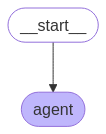

In [3]:
# get agent instance
react_rag_agent = container.react_rag_agent()

# Create Graph
workflow = react_rag_agent.get_workflow(agent["id"])
experiment_utils.print_graph(workflow)

In [4]:
agent_config = {
    "configurable": {
        "thread_id": agent["id"],
    },
    "recursion_limit": 30
}

In [5]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="What is the pinnacle of excellence?",
    agent_id=agent["id"]
)

inputs = react_rag_agent.get_input_params(message)
result = workflow.invoke(inputs, agent_config)

In [6]:
print(result.keys())

dict_keys(['messages'])


In [7]:
print(result['messages'][-1].content)

<thinking>
The user is asking for the highest standard or peak level in a general context. The provided text comes from Sun Tzu's "Art of War," which discusses excellence not only as it pertains to war but also metaphorically applies these ideas broadly.

Key points extracted include that supreme excellence involves avoiding direct confrontation, deceiving and outmaneuvering an opponent without engaging them directly ("breaking the enemy’s resistance without fighting"), planning secretly with strategic forethought (foiling one's enemies), ensuring victories are not obvious or expected by others ("the common herd"), achieving certainty in victory through perfectionist tactics devoid of mistakes.

The ultimate peak is a state where one controls success, adheres to moral laws and discipline strictly while also being methodical. The pinnacle encompasses understanding measurement as Earth signifies the base foundation; estimation quantifies it further which leads to calculation (a more comp

In [10]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Kun je mijn vorige vraag en jouw antwoord herhalen in Nederlands alstublieft? Gebruik maximaal tien zinnen.",
    agent_id=agent["id"]
)

inputs = react_rag_agent.get_input_params(message)
result = workflow.invoke(inputs, agent_config)

In [11]:
print(result['messages'][-1].content)

<thinking>
The user requests a summary of Sun Tzu's strategies from his "Art of War" translated into Dutch. The context provided includes advice on choosing battlefields and tactics based on the terrain type (flat ground for not attacking; easy land where one should halt, contentious to avoid attack). It also details rewards in chariot battles after capturing ten enemy units as a form of leveraging conquered enemies' strength.

Additionally included are various principles from Sun Tzu's work:

- The importance placed upon victory over prolonged campaigns.
- Military virtues adjusted with humanity or benevolence and courage/sincerity taking precedence, along with an explanation involving the rearrangement of virtue names in translation for clarity (e.g., 'uprightness' becomes one of military terms like "courage").
- Strategies against a disciplined enemy force: surround if outnumbered ten to one; attack when five to one. Divide forces into smaller units instead of relying on numerical s